# Data Import

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

file_path = '/content/drive/MyDrive/DataSet_EU_3k_5k.xlsx'
data = pd.read_excel(file_path)
data.head()

,Power_1,Power_2,Power_3,Power_4,Power_5,Power_6,Power_7,Power_8,Power_9,Power_10,...,GSNR_69,GSNR_70,GSNR_71,GSNR_72,GSNR_73,GSNR_74,GSNR_75,GSNR_76,No. Spans,Total Distance(m)
0,0.000000,0.000000,0.000007,0.000007,0.000007,0.000000,0.000007,0.0,0.000007,0.0,...,90.061284,0.000000,0.000000,0.000000,0.000000,95.045789,0.000000,0.000000,8,690608.0
1,0.000000,0.000007,0.000000,0.000007,0.000000,0.000007,0.000000,0.0,0.000000,0.0,...,0.000000,92.560867,0.000000,0.000000,89.544975,0.000000,0.000000,0.000000,8,690608.0
2,0.000000,0.000000,0.000000,0.000007,0.000000,0.000000,0.000000,0.0,0.000007,0.0,...,0.000000,0.000000,90.991977,0.000000,0.000000,0.000000,85.512399,83.114113,8,690608.0
3,0.000007,0.000007,0.000007,0.000007,0.000007,0.000000,0.000000,0.0,0.000007,0.0,...,76.409583,73.664915,74.651700,79.071217,0.000000,0.000000,0.000000,0.000000,8,690608.0
4,0.000000,0.000000,0.000007,0.000000,0.000007,0.000000,0.000000,0.0,0.000007,0.0,...,0.000000,0.000000,78.299438,74.910765,72.030907,73.790264,81.190439,0.000000,8,690608.0


# Individual Visualizations

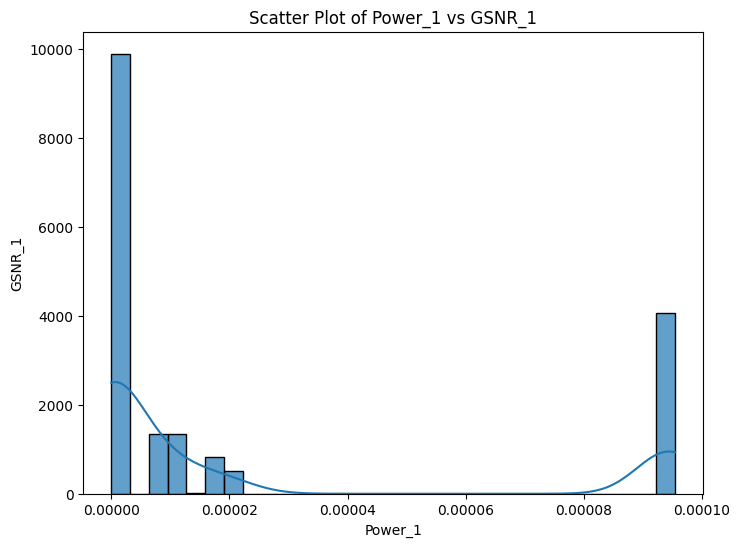

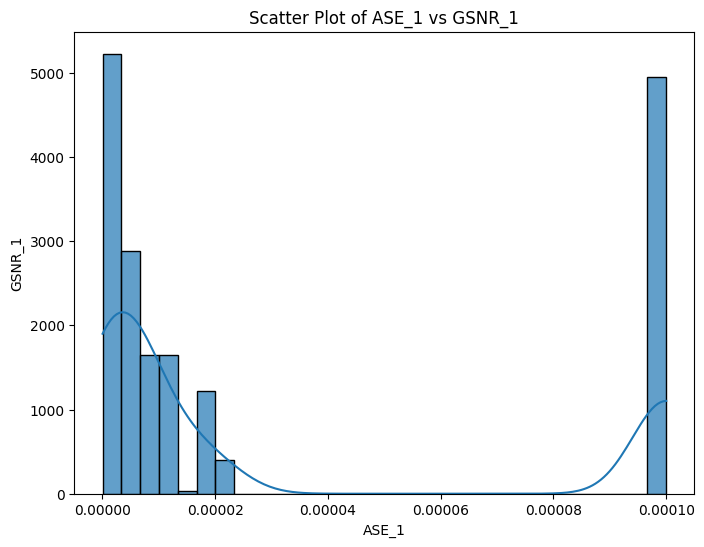

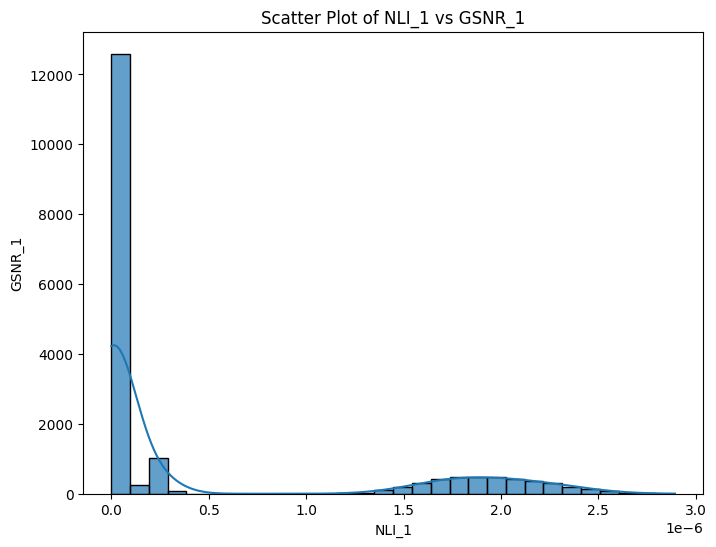

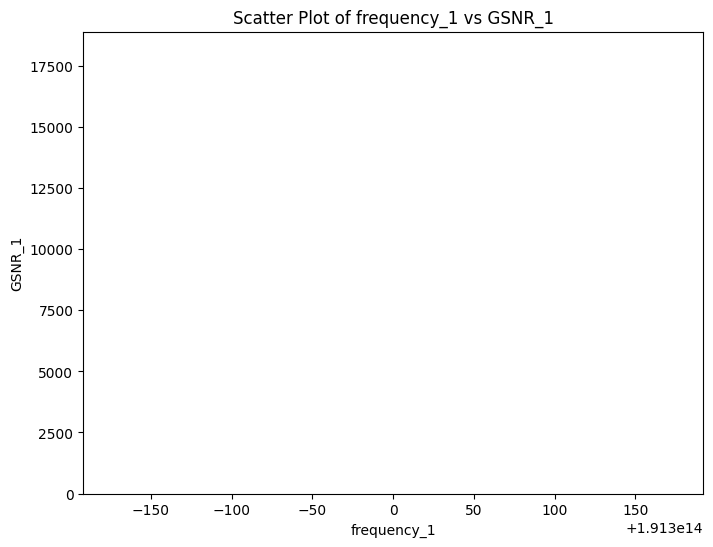

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the attribute columns and the target variable
attribute_columns = [f'Power_{i}' for i in range(1, 2)] + [f'ASE_{i}' for i in range(1, 2)] + [f'NLI_{i}' for i in range(1, 2)] + [f'frequency_{i}' for i in range(1, 2)]
target_column = 'GSNR_1'

# Plot histogram plots for each attribute column against the target variable
for column in attribute_columns:
    plt.figure(figsize=(8, 6))
    # sns.scatterplot(data=data, x=column, y=target_column, alpha=0.7)
    sns.histplot(data=data, x=column, kde=True, bins=30, alpha=0.7)
    plt.title(f'Scatter Plot of {column} vs {target_column}')
    plt.xlabel(column)
    plt.ylabel(target_column)
    plt.show()


# Collective Visualizations

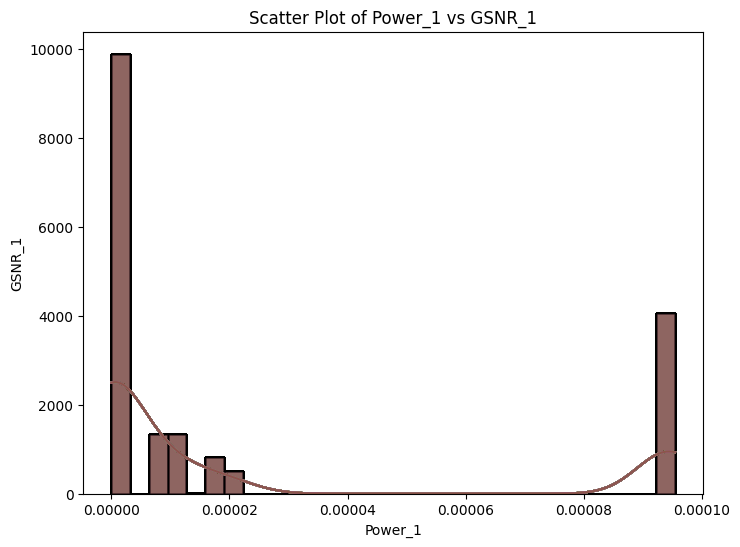

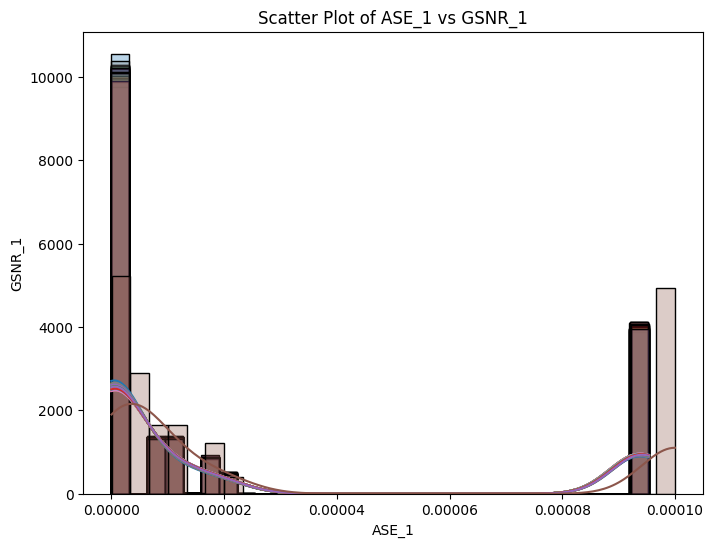

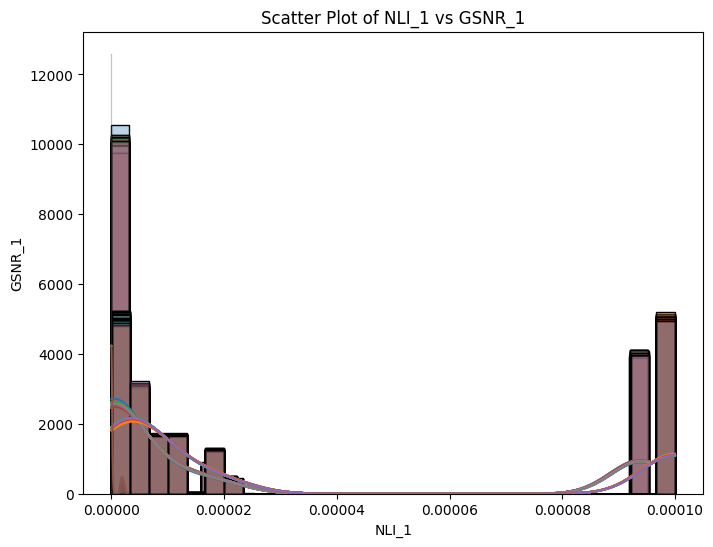

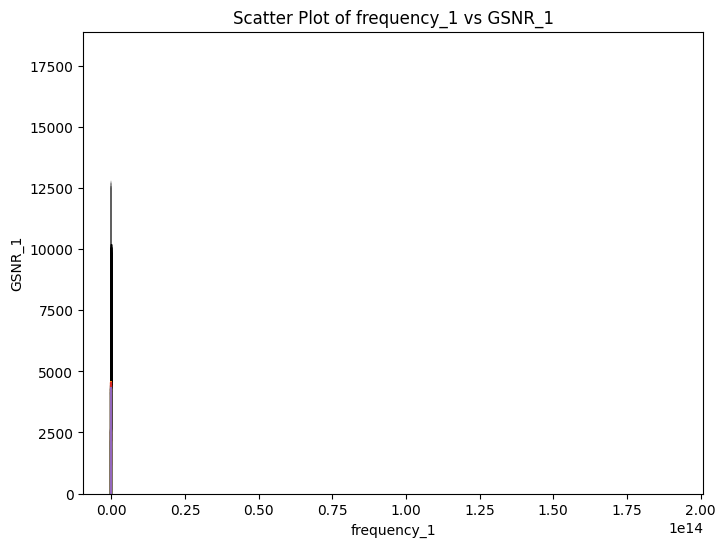

In [20]:
attribute_columns = [f'Power_{i}' for i in range(1, 76)] + [f'ASE_{i}' for i in range(1, 76)] + [f'NLI_{i}' for i in range(1, 76)] + [f'frequency_{i}' for i in range(1, 76)]

# Plot histogram plots for each attribute column with all 76 columns against the target variable in one plot.
for i in range(4):
  plt.figure(figsize=(8, 6))
  for j in range(76):
      sns.histplot(data=data, x=attribute_columns[i*j], kde=True, bins=30, alpha=0.3)
  plt.title(f'Scatter Plot of {attribute_columns[i*j]} vs {target_column}')
  plt.xlabel(attribute_columns[i*j])
  plt.ylabel(target_column)
  plt.show()

# Normalization

In [31]:
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# MinMax Normalization
scaler = MinMaxScaler()
mxdata = scaler.fit_transform(data[attribute_columns])
mxdata = pd.DataFrame(mxdata, columns=attribute_columns)

label = data[target_column].values.reshape(-1, 1)
mydata = scaler.fit_transform(label)
mydata = pd.DataFrame(mydata, columns=[target_column])

# Z-Score Normalization
scaler = StandardScaler()
zxdata = scaler.fit_transform(data[attribute_columns])
zxdata = pd.DataFrame(zxdata, columns=attribute_columns)

zydata = scaler.fit_transform(label)
zydata = pd.DataFrame(zydata, columns=[target_column])

# Display the first few rows of the normalized data
print("MinMax Normalized Data:")
print(mxdata['Power_1'].head(),mxdata['ASE_1'].head(),mxdata['NLI_1'].head(),mxdata['frequency_1'].head())
print(mydata.head())

print("Z-Score Normalized Data:")
print(zxdata['Power_1'].head(),mxdata['ASE_1'].head(),mxdata['NLI_1'].head(),mxdata['frequency_1'].head())
print(zydata.head())

MinMax Normalized Data:
0    0.000000
1    0.000000
2    0.000000
3    0.076798
4    0.000000
Name: Power_1, dtype: float64 0    0.075117
1    0.073203
2    0.073788
3    0.000062
4    0.071547
Name: ASE_1, dtype: float64 0    0.000000
1    0.000000
2    0.000000
3    0.017928
4    0.000000
Name: NLI_1, dtype: float64 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: frequency_1, dtype: float64
    GSNR_1
0  0.00000
1  0.00000
2  0.00000
3  0.79791
4  0.00000
Z-Score Normalized Data:
0   -0.627072
1   -0.627072
2   -0.627072
3   -0.435928
4   -0.627072
Name: Power_1, dtype: float64 0    0.075117
1    0.073203
2    0.073788
3    0.000062
4    0.071547
Name: ASE_1, dtype: float64 0    0.000000
1    0.000000
2    0.000000
3    0.017928
4    0.000000
Name: NLI_1, dtype: float64 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: frequency_1, dtype: float64
     GSNR_1
0 -0.652535
1 -0.652535
2 -0.652535
3  2.230895
4 -0.652535


# Correlations

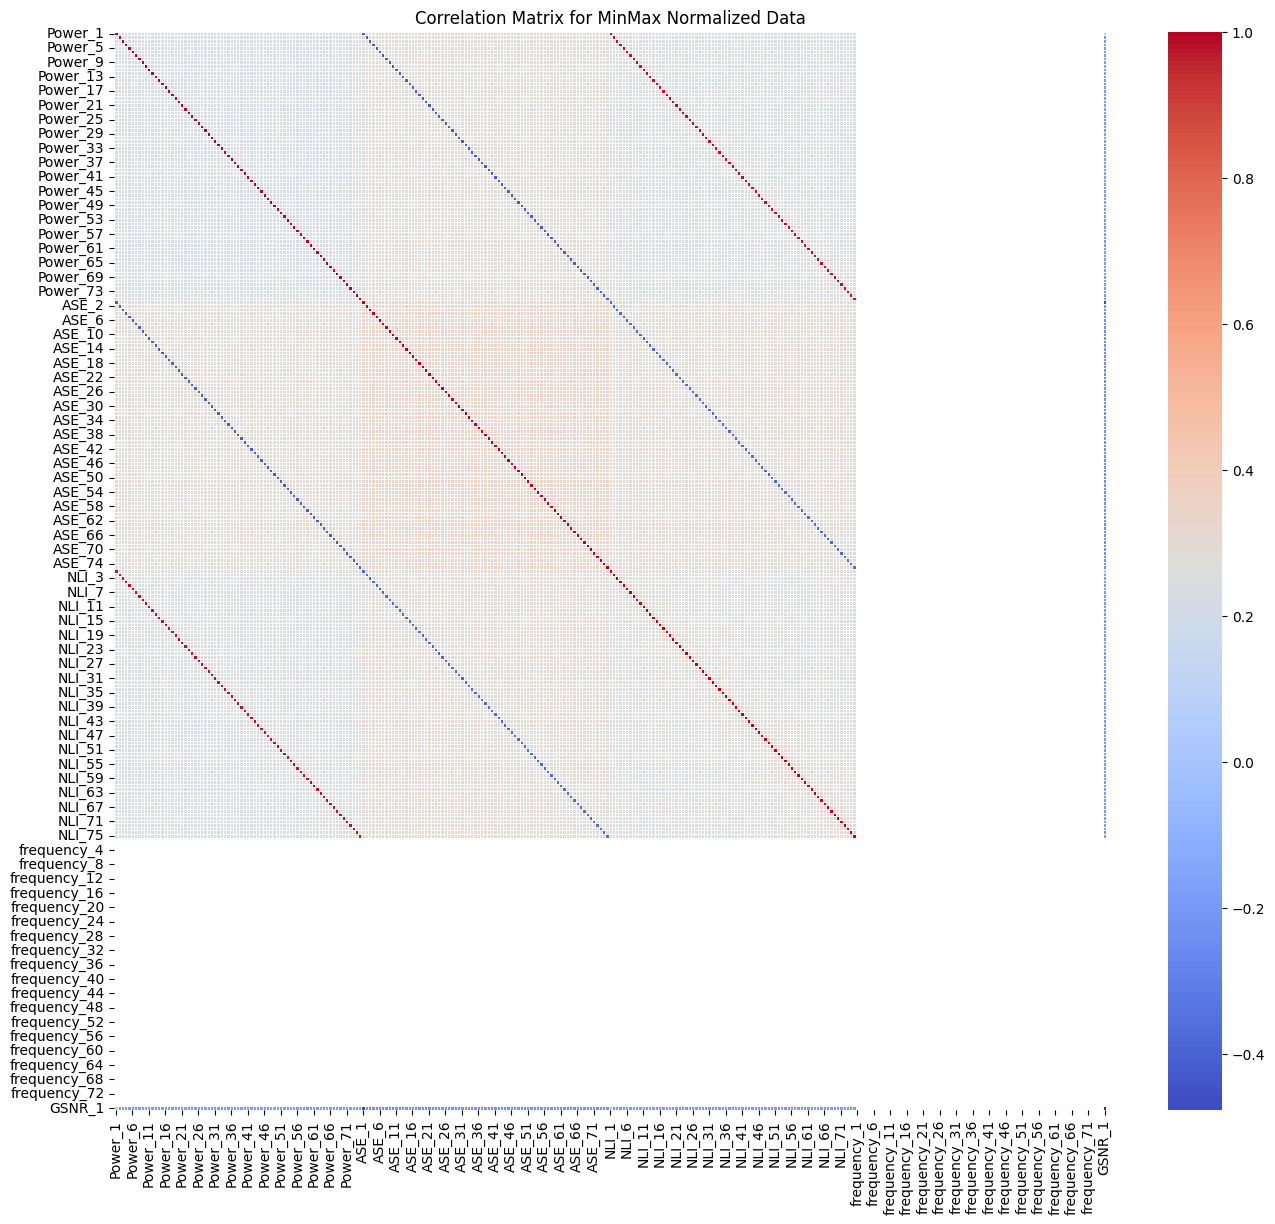

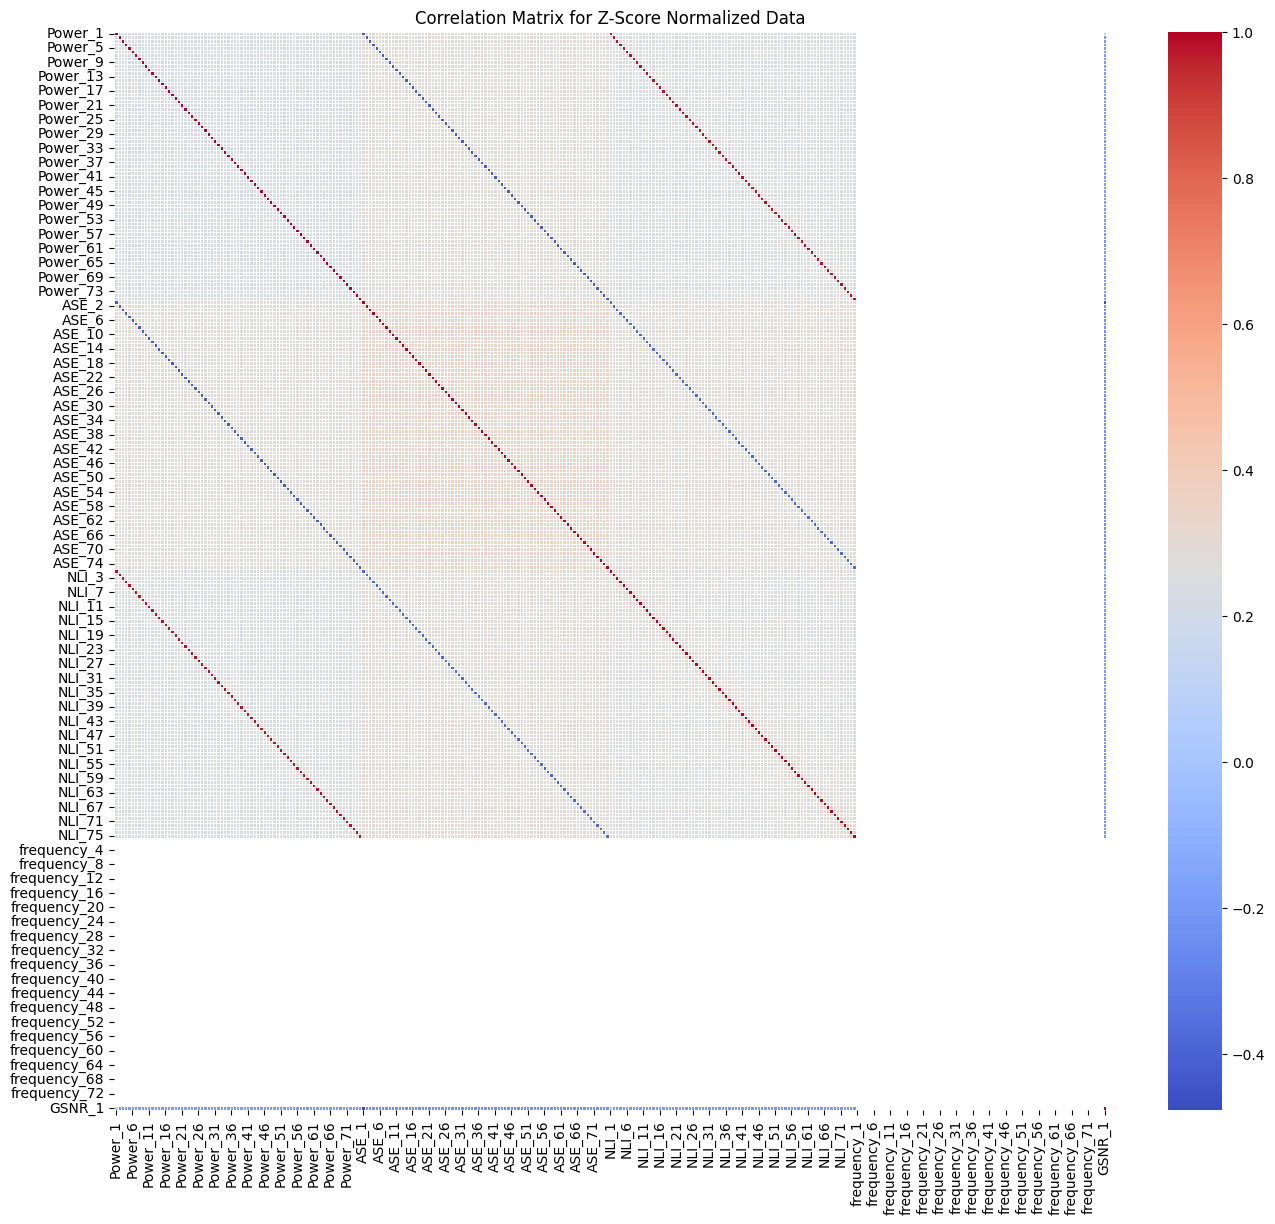

In [33]:
# Compute correlation matrices
# MinMax Normalized Data
minmax_corr_matrix = mxdata.corr()

# Z-Score Normalized Data
zscore_corr_matrix = zxdata.corr()

# Visualize correlation matrices using heatmaps
plt.figure(figsize=(16, 14))
sns.heatmap(minmax_corr_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix for MinMax Normalized Data')
plt.show()

plt.figure(figsize=(16, 14))
sns.heatmap(zscore_corr_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix for Z-Score Normalized Data')
plt.show()

# The empty space at frequency column and row show that there is not any correlation due to constant values of freqency

# Train Test Split

In [36]:
from sklearn.model_selection import train_test_split

# Define the attribute columns excluding frequency
attribute_columns_without_frequency = [col for col in attribute_columns if 'frequency' not in col]

# Splitting Z-score normalized data excluding frequency columns
zxdata_train, zxdata_test, zydata_train, zydata_test = train_test_split(zxdata[attribute_columns_without_frequency], zydata[target_column], test_size=0.2, random_state=42)

# Splitting MinMax normalized data excluding frequency columns
mxdata_train, mxdata_test, mydata_train, mydata_test = train_test_split(mxdata[attribute_columns_without_frequency], mydata[target_column], test_size=0.2, random_state=42)

# Print the shapes of the train-test splits
print("Z-Score Normalized Data (excluding frequency columns):")
print("Train data shape:", zxdata_train.shape)
print("Test data shape:", zxdata_test.shape)

print("\nMinMax Normalized Data (excluding frequency columns):")
print("Train data shape:", mxdata_train.shape)
print("Test data shape:", mxdata_test.shape)


Z-Score Normalized Data (excluding frequency columns):
Train data shape: (14400, 225)
Test data shape: (3600, 225)

MinMax Normalized Data (excluding frequency columns):
Train data shape: (14400, 225)
Test data shape: (3600, 225)


# Models

In [37]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error

# Initialize regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'KNN Model': KNeighborsRegressor(),
    'Support Vector Machines (SVM)': SVR(),
    'Gaussian Regression': GaussianProcessRegressor(),
}

# Train and evaluate each model on Z-score normalized data
print("Z-Score Normalized Data:")
for model_name, model in models.items():
    model.fit(zxdata_train, zydata_train)
    zydata_pred = model.predict(zxdata_test)
    mse = mean_squared_error(zydata_test, zydata_pred)
    print(f"{model_name}: Mean Squared Error = {mse:.4f}")

# Train and evaluate each model on MinMax normalized data
print("\nMinMax Normalized Data:")
for model_name, model in models.items():
    model.fit(mxdata_train, mydata_train)
    mydata_pred = model.predict(mxdata_test)
    mse = mean_squared_error(mydata_test, mydata_pred)
    print(f"{model_name}: Mean Squared Error = {mse:.4f}")


Z-Score Normalized Data:
Linear Regression: Mean Squared Error = 0.6291
Ridge Regression: Mean Squared Error = 0.6275
Lasso Regression: Mean Squared Error = 0.9664
Random Forest Regression: Mean Squared Error = 0.0003
Gradient Boosting Regression: Mean Squared Error = 0.0003
Decision Tree Regression: Mean Squared Error = 0.0008
KNN Model: Mean Squared Error = 0.4659
Support Vector Machines (SVM): Mean Squared Error = 0.6282
Gaussian Regression: Mean Squared Error = 0.0823

MinMax Normalized Data:
Linear Regression: Mean Squared Error = 0.0482
Ridge Regression: Mean Squared Error = 0.0480
Lasso Regression: Mean Squared Error = 0.0740
Random Forest Regression: Mean Squared Error = 0.0000
Gradient Boosting Regression: Mean Squared Error = 0.0000
Decision Tree Regression: Mean Squared Error = 0.0001
KNN Model: Mean Squared Error = 0.0353
Support Vector Machines (SVM): Mean Squared Error = 0.0260
Gaussian Regression: Mean Squared Error = 0.0040


# Conclusion

**Random Forest Regression and Gradient Boosting Regression:**

1. These ensemble methods are known for their robustness and ability to handle complex relationships in data.

2. They work by combining multiple decision trees, which allows them to capture intricate patterns in the data.

3. Both models are less prone to overfitting compared to single decision trees because they use techniques like bagging (Random Forest) and boosting (Gradient Boosting) to aggregate predictions from multiple weak learners.

**Decision Tree Regression:**

1. Decision trees are simple yet powerful models that partition the feature space based on the values of input features.

2. They can capture complex relationships and interactions between features, leading to low MSE values.

3. Decision trees tend to overfit the training data, but in this case, the low MSE suggests that the trees were pruned effectively or ensemble methods were used (like Random Forest or Gradient Boosting) to mitigate overfitting.

**Support Vector Machines (SVM):**

1. SVM aims to find the hyperplane that best separates the classes in the feature space.

2. In regression tasks, SVM tries to find a hyperplane that best fits the data, while also maximizing the margin between instances.

3. SVM tends to perform well when there is a clear margin of separation between classes or when the data is linearly separable.

**Lasso Regression:**

1. Lasso Regression adds a penalty term (L1 regularization) to the ordinary least squares objective function, which penalizes large coefficients.

2. The high MSE for Lasso Regression on Z-Score Normalized data suggests that it may have penalized too many coefficients, resulting in underfitting or inability to capture important features.

**Gaussian Regression:**

1. Gaussian Process Regression is a non-parametric Bayesian approach that models the target variable as a Gaussian process.

2. It can capture complex relationships and uncertainties in the data, which might have contributed to its relatively low MSE values.